In [2]:
import random as r

%matplotlib inline
import numpy as np
import math as m
import matplotlib.pyplot as plt

61.2 hrs
42.4496882038 hrs


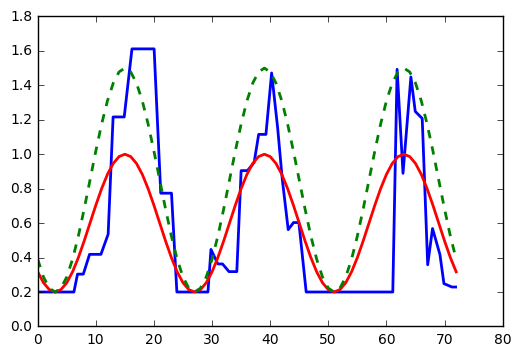

In [74]:
def powerLoadR(t):
    rf = r.uniform(0,1)
    p = .65*m.sin((2*m.pi/24)*(t + 15)) + rf
    if p < .2: p = .2
    return p
def powerLoad(t):
    #rf = r.uniform(-1,1)
    return .65*m.sin((2*m.pi/24)*(t + 15)) + .85

def reducedPowerLoadEstimate(t):
    return .4*m.sin((m.pi/12)*(t + 15)) + .6

time = []
t2 = []
power = []
powerRand = []

days = 3*24
holdHistory = []

for i in np.arange(0,days + 1):
    time.append(i)
    power.append(powerLoad(i))
    
    t2.append(i + r.uniform(-.2,.3)) # Randomized variation
    #if t2[0] < 0: t2[0] = 0 # For 1st time through
    
    hold = r.randint(0,1) # sometimes power is held
    holdHistory.append(hold)
    if hold and len(powerRand) > 0: # if True
        powerRand.append(powerRand[-1])
    else:
        powerRand.append(powerLoadR(t2[-1]))
t2[0] = 0

# For comparing the continuous function
contPower = []
for i in time: contPower.append(reducedPowerLoadEstimate(i))


plt.plot(t2,powerRand,
         time, contPower, 'red',
         time, power, '--', linewidth=2)

dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off
#line.set_dashes(dashes)

print(np.trapz(power,x=time),"hrs")
print(np.trapz(powerRand,x=t2),"hrs")
plt.show()

In [4]:
# maybe insert 0 for initial time on linear data; copy first power value or adjust it slightly
a = [1,2]
a.insert(0,0)

In [5]:
a

[0, 1, 2]

Adding fluff/distractor columns to the data

110.40908844718156 131.16935838532603


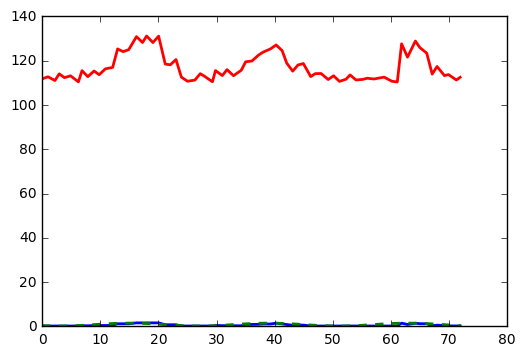

In [130]:
minTemp = 110
def randTemperature(p):
    temp = (12*(p) + minTemp)+2*r.uniform(-1,1) # some variation added
    #if temp < minTemp: temp = minTemp #r.uniform(-.1,.2)*110 + 110
    return temp

rTemp = []
# tempTime = []
# for i in time: # not sure it's worth the extra complexity to have temp. follow power timing
#     tempTime.append(i + 1)
for i in powerRand: 
    rTemp.append(randTemperature(i))

print(min(rTemp),max(rTemp))
    
plt.plot(t2,powerRand,
         #tempTime, rTemp, 'red',
         t2, rTemp, 'red',
         time, power, '--', linewidth=2)
plt.show()

Print the data to a file

In [146]:
tC = 9 # number of characters in Time heading
pC = 10
tempC = 13
dec = 4
space = 3
sStr = ""
for i in range(space): sStr += " "#"0"
#print("|"+sStr+"|")

with open('linearData.txt', 'w') as f:
    #read_data = f.read()
    #f.write('This is a test\nThis is another test\n')
    f.write('Time (hr)'+sStr+'Temp (deg. C)'+sStr+'Power (kW)'+'\n')
    f.write('---------'+sStr+'-------------'+sStr+'----------'+'\n')
    for i in range(len(t2)): 
        f.write(str(round(t2[i],dec)).ljust(tC) + sStr +\
                str(round(rTemp[i],dec)).ljust(tempC) + sStr +\
                str(round(powerRand[i],dec)).ljust(pC)\
                # + '   '\
                + "\n")
f.closed

True

In [29]:
print("time".ljust(6)+"3")

time  3


In [31]:
print('Time (hr)'.ljust(n)+"   "+"Power (kW)".ljust(n))

Time (hr)   Power (kW)
